In [50]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.float_format = '{:.2f}'.format

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import scipy.stats as ss


***

# TweetsCov19


***

- Tweetspolarisiation

In [6]:
path = '../../data/tweetscov19_tweets_political_polarized.tsv'

df_politic = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Number_of_liberals','Number_of_conservatives'])

print('Shape :', df_politic.shape)
df_politic.head()

Shape : (9409841, 3)


,Tweet_Id,Number_of_liberals,Number_of_conservatives
0,1178791637348212736,0,0
1,1178791641601232896,0,0
2,1178791643509612547,0,0
3,1178791644214235137,0,0
4,1178791645371875329,0,0


In [7]:
df_politic['tweet_political_polarisation'] = df_politic.apply(lambda row: ( ((row['Number_of_liberals'] + row['Number_of_conservatives'])) / ((row['Number_of_conservatives'] - row['Number_of_liberals'])) if (row['Number_of_conservatives'] - row['Number_of_liberals']) != 0 else 0), axis=1)

In [8]:
path = '../../data/tweetscov19_tweets_science_polarized.tsv'

df_science = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'number_of_antisciens_domains','number_of_prosciens_domains'])

print('Shape :', df_science.shape)
df_science.head()

Shape : (9409841, 3)


,Tweet_Id,number_of_antisciens_domains,number_of_prosciens_domains
0,1178791637348212736,0,0
1,1178791641601232896,0,0
2,1178791643509612547,0,0
3,1178791644214235137,0,0
4,1178791645371875329,0,0


In [9]:
df_science['tweet_science_polarisation'] = df_science.apply(lambda row: ((row['number_of_antisciens_domains'] + row['number_of_prosciens_domains']) / (row['number_of_prosciens_domains'] - row['number_of_antisciens_domains']) if (row['number_of_prosciens_domains'] - row['number_of_antisciens_domains']) != 0 else 0 ) , axis=1)

In [10]:
path = '../../data/tweetscov19_tweets_moderacy_polarized.tsv'

df_moderacy = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Number_of_moderate_domains', 'Number_of_hardline_domains'])

print('Shape :', df_moderacy.shape)
df_moderacy.head()

Shape : (9409841, 3)


,Tweet_Id,Number_of_moderate_domains,Number_of_hardline_domains
0,1178791637348212736,0,0
1,1178791641601232896,0,0
2,1178791643509612547,0,0
3,1178791644214235137,0,0
4,1178791645371875329,0,0


In [11]:
df_moderacy['tweet_moderacy_polarisation'] = df_moderacy.apply(lambda row: ( (row['Number_of_moderate_domains'] + row['Number_of_hardline_domains']) / ( row['Number_of_hardline_domains'] - row['Number_of_moderate_domains']) if ( row['Number_of_hardline_domains'] - row['Number_of_moderate_domains']) != 0 else 0 ), axis=1)

In [12]:
df_politic = df_politic[['Tweet_Id','tweet_political_polarisation']]
df_tweetscov19 = df_politic

df_science = df_science[['Tweet_Id', 'tweet_science_polarisation']]
df_tweetscov19 = pd.merge(df_tweetscov19, df_science, on='Tweet_Id', how='left')

df_moderacy = df_moderacy[['Tweet_Id', 'tweet_moderacy_polarisation']]
df_tweetscov19 = pd.merge(df_tweetscov19, df_moderacy, on='Tweet_Id', how='left')

In [13]:
print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 4)


,Tweet_Id,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation
0,1178791637348212736,0.00,0.00,0.00
1,1178791641601232896,0.00,0.00,0.00
2,1178791643509612547,0.00,0.00,0.00
3,1178791644214235137,0.00,0.00,0.00
4,1178791645371875329,0.00,0.00,0.00


***

***

In [14]:
path = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/TweetsCov19_sample/TweetsCov19_sample_original.tsv'

df_tweetscov19_sample = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Timestamp', 'Followers', 'Friends', 'Retweets', 'Favorites', 'Entities', 'Sentiment', 'Mentions', 'Hashtags', 'URLs', 'text', 'is_deleted', 'Mentions_num', 'Hashtags_num', 'Urls_num', 'Domains', 'Text_len', 'readability', 'Vader_neg', 'Vader_neu', 'Vader_pos', 'Vader_compound', 'Emojies', 'Emoji_num', 'Emoji_neg', 'Emoji_neu', 'Emoji_pos', 'Emoji_sentiment', 'Emoji_bearbeiteten'])

print('Shape :', df_tweetscov19_sample.shape)
df_tweetscov19_sample.head()

Shape : (9409841, 31)


,Tweet_Id,Username,Timestamp,Followers,Friends,Retweets,Favorites,Entities,Sentiment,Mentions,Hashtags,URLs,text,is_deleted,Mentions_num,Hashtags_num,Urls_num,Domains,Text_len,readability,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Emojies,Emoji_num,Emoji_neg,Emoji_neu,Emoji_pos,Emoji_sentiment,Emoji_bearbeiteten
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,Thu Apr 30 22:00:24 +0000 2020,29697,24040,0,0,null;,1 -1,null;,Opinion Next2blowafrica thoughts,null;,NaN,False,0,3,0,0,3,121.22,-0.00,1.00,0.00,0.00,[],0,-0.00,0.00,0.00,0.00,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;,Really wish the Buckley Club hadn't unleashed ...,False,0,0,0,0,62,37.90,-0.00,0.73,0.27,0.46,[],0,-0.00,0.00,0.00,0.00,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...,Captain Tom Moore's is truely one of the best ...,False,0,0,1,bbc.com,108,78.77,-0.22,0.59,0.19,-0.17,[],0,-0.00,0.00,0.00,0.00,0.00
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,Thu Apr 30 22:04:52 +0000 2020,237,168,0,0,null;,1 -1,null;,null;,https://lockdownsceptics.org/2020/04/30/latest...,Which won't happen: New Zealand’s draconian lo...,False,0,0,1,lockdownsceptics.org,165,55.39,-0.00,1.00,0.00,0.00,[],0,-0.00,0.00,0.00,0.00,0.00
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,Thu Apr 30 22:05:18 +0000 2020,423,427,0,0,i hate u:I_Hate_U:-1.8786140035817729;quaranti...,1 -4,null;,null;,null;,my skin is breaking out and I'm gaining weight...,True,0,0,0,0,66,83.01,-0.21,0.63,0.16,-0.23,[],0,-0.00,0.00,0.00,0.00,0.00


In [15]:
df_tweetscov19_sample = df_tweetscov19_sample[['Tweet_Id', 'Username', 'Retweets', 'Favorites', 'Vader_neg', 'Vader_neu', 'Vader_pos', 'Vader_compound', 'Hashtags_num', 'Mentions_num', 'Text_len', 'Urls_num', 'readability', 'Emoji_num', 'Emoji_sentiment']]
df_tweetscov19_sample.head()

,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Hashtags_num,Mentions_num,Text_len,Urls_num,readability,Emoji_num,Emoji_sentiment
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00


In [16]:
df_tweetscov19 = pd.merge(df_tweetscov19_sample, df_tweetscov19, on='Tweet_Id', how='inner')

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 18)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Hashtags_num,Mentions_num,Text_len,Urls_num,readability,Emoji_num,Emoji_sentiment,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00


***

***

***

***

In [17]:
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/tweetscov19_sample/liwc/tweetsCov19_sample_liwc.tsv'

df_tweetscov19_liwc_risk = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'is_deleted', 'liwc', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk'])

print('shape : ', df_tweetscov19_liwc_risk.shape)
df_tweetscov19_liwc_risk.head()

shape :  (9409841, 40)


,Tweet_Id,is_deleted,liwc,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk
0,1178791637348212736,True,"{'function': 38.46, 'pronoun': 7.69, 'ppron': ...",7.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.85,3.85,0.00
1,1178791641601232896,False,"{'function': 33.33, 'prep': 26.67, 'relativ': ...",6.67,0.00,0.00,0.00,0.00,3.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,0.00,0.00,0.00,0.00,3.33,3.33,0.00,3.33,0.00,0.00
2,1178791643509612547,False,"{'verb': 18.52, 'social': 11.11, 'percept': 3....",11.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1178791644214235137,False,"{'function': 27.27, 'prep': 13.64, 'drives': 9...",4.55,0.00,0.00,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.55,0.00,4.55,0.00,0.00
4,1178791645371875329,False,"{'adj': 8.89, 'affect': 4.44, 'posemo': 4.44, ...",6.67,2.22,2.22,0.00,0.00,4.44,6.67,2.22,2.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.44,0.00,0.00,0.00,0.00,0.00,2.22,0.00,0.00,0.00,0.00,4.44,0.00,2.22,2.22,0.00


In [18]:
df_tweetscov19_liwc_risk= df_tweetscov19_liwc_risk[['Tweet_Id', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk']]

In [19]:
df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_liwc_risk, on='Tweet_Id', how='inner')
print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 55)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Hashtags_num,Mentions_num,Text_len,Urls_num,readability,Emoji_num,Emoji_sentiment,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00


In [20]:
#Die Tweets werden gespeichert. 
path = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel_final/tweetscov19_tweet_features_for_model_p0.tsv'

with open(path, 'w', newline='', encoding="utf-8") as out_file:
    tsv_writer = csv.writer(out_file, delimiter="\t")
    for idx, row in df_tweetscov19.iterrows():
        tsv_writer.writerow(row.values.tolist())

***

***

In [2]:
path = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel_final/tweetscov19_tweet_features_for_model_p0.tsv'

df_tweetscov19 = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Retweets', 'Favorites', 'Vader_neg', 'Vader_neu', 'Vader_pos', 'Vader_compound', 'Hashtags_num', 'Mentions_num', 'Text_len', 'Urls_num', 'readability', 'Emoji_num', 'Emoji_sentiment', 'tweet_political_polarisation', 'tweet_science_polarisation', 'tweet_moderacy_polarisation', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk' ])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 55)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Hashtags_num,Mentions_num,Text_len,Urls_num,readability,Emoji_num,Emoji_sentiment,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00


In [3]:
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/tweetscov19_sample/liwc/tweetsCov19_sample_liwc_2.tsv'

df_tweetscov19_time = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'is_deleted','focuspast', 'focuspresent', 'focusfuture', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'see', 'hear', 'feel', 'motion', 'space', 'time'])


print('shape : ', df_tweetscov19_time.shape)
df_tweetscov19_time.head()

shape :  (9409841, 29)


,Tweet_Id,is_deleted,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time
0,1178791637348212736,True,0.00,3.85,0.00,0.00,0.00,7.69,0.00,0.00,0.00,3.85,19.23,0.00,3.85,11.54,0.00,3.85,7.69,7.69,0.00,0.00,0.00,0.00,0.00,0.00,3.85,7.69,7.69
1,1178791641601232896,False,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,26.67,3.33,0.00,0.00,0.00,6.67,3.33,3.33,0.00,0.00,0.00,0.00,3.33,0.00,3.33,10.00,6.67
2,1178791643509612547,False,14.81,3.70,0.00,0.00,0.00,3.70,0.00,0.00,3.70,3.70,11.11,3.70,0.00,0.00,3.70,18.52,3.70,3.70,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,3.70
3,1178791644214235137,False,0.00,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.00,9.09,13.64,0.00,0.00,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.55,13.64
4,1178791645371875329,False,2.22,13.33,2.22,4.44,0.00,0.00,0.00,0.00,6.67,4.44,11.11,6.67,0.00,4.44,0.00,17.78,8.89,0.00,2.22,0.00,0.00,0.00,0.00,0.00,0.00,2.22,6.67


In [4]:
df_tweetscov19_time.drop('is_deleted', axis=1, inplace=True)

In [5]:
df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_time, on='Tweet_Id', how='inner')

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 82)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Hashtags_num,Mentions_num,Text_len,Urls_num,readability,Emoji_num,Emoji_sentiment,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,10.53,5.26,5.26,5.26,0.00,0.00,0.00,10.53,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,5.26
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,11.11,14.81,0.00,0.00,0.00,0.00,0.00,0.00,3.70,3.70,7.41,11.11,0.00,3.70,0.00,25.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.41
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,14.29,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,7.14,7.14,0.00,7.14,0.00,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,0.00,7.14,0.00


In [6]:
path = '../../data/tweetscov19_political_polarized_users.tsv'

df_tweetscov19_political_polarized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'political_polarisation'])

print('Shape :', df_tweetscov19_political_polarized.shape)
df_tweetscov19_political_polarized.head()

Shape : (171353, 5)


,Username,Number_of_liberals,Number_of_conservatives,Sum_polarised_domains,political_polarisation
0,00008ca06f863b962f72cc9167d7978a,-1,0,1,-1.00
1,00008de3f61d5f04329ee6867d5475b9,-1,0,1,-1.00
2,00012a177385cd6e7590e2acb3f206e3,-1,0,1,-1.00
3,00016e20a3865cb74581803c27d27b89,-1,0,1,-1.00
4,000186b796b0eb667801aad27ca978eb,-2,0,2,-1.00


In [7]:
path = '../../data/tweetscov19_science_polarized_users.tsv'

df_tweetscov19_science_polarized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_antiscience_domains', 'Number_of_proscience_domains', 'Sum_polarised_domains', 'science_polarisation'])

print('Shape :', df_tweetscov19_science_polarized.shape)
df_tweetscov19_science_polarized.head()

Shape : (43943, 5)


,Username,Number_of_antiscience_domains,Number_of_proscience_domains,Sum_polarised_domains,science_polarisation
0,000238f324f5063164908c27a7f310cd,-1,0,1,-1.00
1,0002eb2aff20e181397afe8cdebdd395,0,1,1,1.00
2,00065a00b971b5e1629d504e0ddf2da0,-3,0,3,-1.00
3,0006a238065c3acb128041e666b58f07,0,2,2,1.00
4,000795932bf3bc3ab05b5efc1b07104b,-1,0,1,-1.00


In [8]:
path = '../../data/tweetsCov19_moderacy_polarized_users.tsv'

df_tweetscov19_moderacy_polarized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_moderates', 'Number_of_hardlines', 'Sum_polarised_domains', 'moderacy_polarisation'])

print('Shape :', df_tweetscov19_moderacy_polarized.shape)
df_tweetscov19_moderacy_polarized.head()

Shape : (170670, 5)


,Username,Number_of_moderates,Number_of_hardlines,Sum_polarised_domains,moderacy_polarisation
0,00008ca06f863b962f72cc9167d7978a,-1,0,1,-1.00
1,00008de3f61d5f04329ee6867d5475b9,0,1,1,1.00
2,00012a177385cd6e7590e2acb3f206e3,0,1,1,1.00
3,00016e20a3865cb74581803c27d27b89,-1,0,1,-1.00
4,000186b796b0eb667801aad27ca978eb,-2,0,2,-1.00


In [9]:
pfad_tsv = '../../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,1.00,21,21,1.00
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,1.00,21,21,1.00
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,1.00,21,21,1.00
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,1.00,21,21,1.00
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,1.00,21,21,1.00


In [10]:
df_tweetscov19_alltweets_reputation_deletionratio = df_tweetscov19_alltweets_reputation_deletionratio[['Tweet_Id', 'num_posted', 'num_deleted', 'Deletionratio', 'Reputation', 'is_deleted']]
df_tweetscov19_political_polarized = df_tweetscov19_political_polarized[['Username', 'political_polarisation']]
df_tweetscov19_science_polarized = df_tweetscov19_science_polarized[['Username', 'science_polarisation']]
df_tweetscov19_moderacy_polarized = df_tweetscov19_moderacy_polarized[['Username', 'moderacy_polarisation']]

df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_political_polarized, on='Username', how='left')
df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_science_polarized, on='Username', how='left')
df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_moderacy_polarized, on='Username', how='left')

df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_alltweets_reputation_deletionratio, on='Tweet_Id', how='inner')

print('Form :', df_tweetscov19.shape)
df_tweetscov19.head()

Form : (9409841, 90)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Hashtags_num,Mentions_num,Text_len,Urls_num,readability,Emoji_num,Emoji_sentiment,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,political_polarisation,science_polarisation,moderacy_polarisation,num_posted,num_deleted,Deletionratio,Reputation,is_deleted
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,9,8,0.89,0.52,False
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,1,0,0.00,0.38,False
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,10.53,5.26,5.26,5.26,0.00,0.00,0.00,10.53,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,5.26,-1.00,NaN,-1.00,1,0,0.00,0.61,False
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,11.11,14.81,0.00,0.00,0.00,0.00,0.00,0.00,3.70,3.70,7.41,11.11,0.00,3.70,0.00,25.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.41,NaN,NaN,NaN,7,0,0.00,0.57,False
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,14.29,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,7.14,7.14,0.00,7.14,0.00,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,0.00,7.14,0.00,NaN,NaN,NaN,1,1,1.00,0.50,True


In [11]:
df_tweetscov19 = df_tweetscov19.replace(np.nan, 0)

In [12]:
df_tweetscov19.head()

,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Hashtags_num,Mentions_num,Text_len,Urls_num,readability,Emoji_num,Emoji_sentiment,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,political_polarisation,science_polarisation,moderacy_polarisation,num_posted,num_deleted,Deletionratio,Reputation,is_deleted
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9,8,0.89,0.52,False
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0.00,0.38,False
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,10.53,5.26,5.26,5.26,0.00,0.00,0.00,10.53,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,5.26,-1.00,0.00,-1.00,1,0,0.00,0.61,False
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,11.11,14.81,0.00,0.00,0.00,0.00,0.00,0.00,3.70,3.70,7.41,11.11,0.00,3.70,0.00,25.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.41,0.00,0.00,0.00,7,0,0.00,0.57,False
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,14.29,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,7.14,7.14,0.00,7.14,0.00,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,0.00,7.14,0.00,0.00,0.00,0.00,1,1,1.00,0.50,True


In [13]:
#Die Tweets werden gespeichert. 
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel_final/tweetscov19_tweet_features_for_model.tsv'

with open(pfad_tsv, 'w', newline='', encoding="utf-8") as out_file:
    tsv_writer = csv.writer(out_file, delimiter="\t")
    for idx, row in df_tweetscov19.iterrows():
        tsv_writer.writerow(row.values.tolist())

***

In [2]:
#Die ausgewählten Tweets werden gelesen. 
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel_final/tweetscov19_tweet_features_for_model.tsv'

df_tweetscov19 = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Retweets', 'Favorites', 'Vader_neg', 'Vader_neu', 'Vader_pos', 'vader_compound', 'Hashtags_num', 'Mentions_num', 'Text_len', 'URLs_num', 'readability', 'Emoji_num', 'Emoji_sent', 'tweet_political_polarisation', 'tweet_science_polarisation', 'tweet_moderacy_polarisation', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'see', 'hear', 'feel', 'motion', 'space', 'time', 'user_political_polarisation', 'user_science_polarisation', 'user_moderacy_polarisation', 'user_posted_tweets', 'user_deleted_tweets', 'user_Deletion_ratio', 'user_Reputation', 'is_deleted' ])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 90)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,vader_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9,8,0.89,0.52,False
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0.00,0.38,False
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,10.53,5.26,5.26,5.26,0.00,0.00,0.00,10.53,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,5.26,-1.00,0.00,-1.00,1,0,0.00,0.61,False
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,11.11,14.81,0.00,0.00,0.00,0.00,0.00,0.00,3.70,3.70,7.41,11.11,0.00,3.70,0.00,25.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.41,0.00,0.00,0.00,7,0,0.00,0.57,False
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,14.29,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,7.14,7.14,0.00,7.14,0.00,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,0.00,7.14,0.00,0.00,0.00,0.00,1,1,1.00,0.50,True


In [3]:
df_tweetscov19_ids_vader = df_tweetscov19[['Tweet_Id', 'Username', 'vader_compound']]

In [4]:
df_tweetscov19_ids_vader['num'] = df_tweetscov19_ids_vader.apply(lambda row: 1, axis=1)

<ipython-input-4-15d1735550e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweetscov19_ids_vader['num'] = df_tweetscov19_ids_vader.apply(lambda row: 1, axis=1)


In [5]:
df_tweetscov19_ids_vader = df_tweetscov19_ids_vader.groupby('Username')[ 'vader_compound', 'num'].sum()

<ipython-input-5-4acffb2e2a2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_tweetscov19_ids_vader = df_tweetscov19_ids_vader.groupby('Username')[ 'vader_compound', 'num'].sum()


In [7]:
df_tweetscov19_ids_vader[df_tweetscov19_ids_vader['vader_compound'] == 0].shape

(697929, 2)

In [8]:
df_tweetscov19_ids_vader['user_vadercompound_average'] = df_tweetscov19_ids_vader.apply(lambda row: (row['vader_compound'] / row['num']) if (row['vader_compound'] != 0) else 0, axis=1)

In [12]:
df_tweetscov19_ids_vader = df_tweetscov19_ids_vader.reset_index()


,Username,vader_compound,num,user_vadercompound_average
0,000000e6bded7cdeaffee6928df45050,-0.36,1,-0.36
1,0000048f8bdf58d9d5afa27556390261,1.45,2,0.73
2,000006f5da1c240d29783090cdf4366a,0.30,1,0.30
3,000007c67e0127cc429b0f2730e72469,-0.23,1,-0.23
4,00000998260226834ffdbdf98ff33eb7,0.17,1,0.17


In [13]:
df_tweetscov19_ids_vader = df_tweetscov19_ids_vader[['Username', 'user_vadercompound_average']]
df_tweetscov19_ids_vader.head()

,Username,user_vadercompound_average
0,000000e6bded7cdeaffee6928df45050,-0.36
1,0000048f8bdf58d9d5afa27556390261,0.73
2,000006f5da1c240d29783090cdf4366a,0.30
3,000007c67e0127cc429b0f2730e72469,-0.23
4,00000998260226834ffdbdf98ff33eb7,0.17


In [14]:
df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_ids_vader, on='Username', how='left')

print('Form :', df_tweetscov19.shape)
df_tweetscov19.head()

Form : (9409841, 91)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,vader_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted,user_vadercompound_average
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9,8,0.89,0.52,False,0.59
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0.00,0.38,False,0.46
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,10.53,5.26,5.26,5.26,0.00,0.00,0.00,10.53,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,5.26,-1.00,0.00,-1.00,1,0,0.00,0.61,False,-0.17
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,11.11,14.81,0.00,0.00,0.00,0.00,0.00,0.00,3.70,3.70,7.41,11.11,0.00,3.70,0.00,25.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.41,0.00,0.00,0.00,7,0,0.00,0.57,False,0.17
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,14.29,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,7.14,7.14,0.00,7.14,0.00,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,0.00,7.14,0.00,0.00,0.00,0.00,1,1,1.00,0.50,True,-0.23


In [15]:
df_tweetscov19['tweet_vadercompound_abweichung'] = df_tweetscov19.apply(lambda row: (row['vader_compound'] - row['user_vadercompound_average']) if (row['vader_compound'] != 0) else 0, axis=1)

In [16]:
df_tweetscov19['tweet_political_polarisation_abweichung'] = df_tweetscov19.apply(lambda row: (row['tweet_political_polarisation'] - row['user_political_polarisation'] ) , axis=1)

In [17]:
df_tweetscov19['tweet_science_polarisation_abweichung'] = df_tweetscov19.apply(lambda row: (row['tweet_science_polarisation'] - row['user_science_polarisation'] ) , axis=1)

In [18]:
df_tweetscov19['tweet_moderacy_polarisation_abweichung'] = df_tweetscov19.apply(lambda row: (row['tweet_moderacy_polarisation'] - row['user_moderacy_polarisation']) , axis=1)

In [19]:
#Die Tweets werden gespeichert. 
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel_final/tweetscov19_tweet_features_for_model_wdf.tsv'

with open(pfad_tsv, 'w', newline='', encoding="utf-8") as out_file:
    tsv_writer = csv.writer(out_file, delimiter="\t")
    for idx, row in df_tweetscov19.iterrows():
        tsv_writer.writerow(row.values.tolist())

***

- 0.75 Quantile wird für die Anzahl der gelöschten Tweets eingesetzt
- Jewels 10K Tweets von den gelöschten und nicht gelöschten Tweets werden per Zufall ausgewählt und gespeichert.  

***

In [2]:
#Die ausgewählten Tweets werden gelesen. 
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel_final/tweetscov19_tweet_features_for_model.tsv'

df_tweetscov19 = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Retweets', 'Favorites', 'Sentiment_negative', 'Sentiment_neutral', 'Sentiment_positive', 'Sentiment_compound', 'Hashtags_num', 'Mentions_num', 'Text_len', 'URLs_num', 'readability', 'Emoji_num', 'Emoji_sent', 'tweet_political_polarisation', 'tweet_science_polarisation', 'tweet_moderacy_polarisation', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'see', 'hear', 'feel', 'motion', 'space', 'time', 'user_political_polarisation', 'user_science_polarisation', 'user_moderacy_polarisation', 'user_posted_tweets', 'user_deleted_tweets', 'user_Deletion_ratio', 'user_Reputation', 'is_deleted', 'user_sentiment_average', 'tweet_sentiment_deviation', 'tweet_political_polarisation_deviation', 'tweet_science_polarisation_deviation', 'tweet_moderacy_polarisation_deviation'])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 95)


,Tweet_Id,Username,Retweets,Favorites,Sentiment_negative,Sentiment_neutral,Sentiment_positive,Sentiment_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted,user_sentiment_average,tweet_sentiment_deviation,tweet_political_polarisation_deviation,tweet_science_polarisation_deviation,tweet_moderacy_polarisation_deviation
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9,8,0.89,0.52,False,0.59,0.00,0.00,0.00,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0.00,0.38,False,0.46,0.00,0.00,0.00,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,10.53,5.26,5.26,5.26,0.00,0.00,0.00,10.53,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,5.26,-1.00,0.00,-1.00,1,0,0.00,0.61,False,-0.17,0.00,0.00,0.00,0.00
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,11.11,14.81,0.00,0.00,0.00,0.00,0.00,0.00,3.70,3.70,7.41,11.11,0.00,3.70,0.00,25.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.41,0.00,0.00,0.00,7,0,0.00,0.57,False,0.17,0.00,0.00,0.00,0.00
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,14.29,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,7.14,7.14,0.00,7.14,0.00,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,0.00,7.14,0.00,0.00,0.00,0.00,1,1,1.00,0.50,True,-0.23,0.00,0.00,0.00,0.00


In [145]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [94]:
print('nuber of unique users', len(df_tweetscov19.Username.unique()))
df_tweetscov19_Username_unique =  df_tweetscov19.drop_duplicates(subset = "Username")

nuber of unique users 4095876


In [4]:
df_tweetscov19_Username_unique.head()

,Tweet_Id,Username,Retweets,Favorites,Sentiment_negative,Sentiment_neutral,Sentiment_positive,Sentiment_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted,user_sentiment_average,tweet_sentiment_deviation,tweet_political_polarisation_deviation,tweet_science_polarisation_deviation,tweet_moderacy_polarisation_deviation
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.00,1.00,0.00,0.00,3,0,3,0,121.22,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9,8,0.89,0.52,False,0.59,0.00,0.00,0.00,0.00
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.00,0.73,0.27,0.46,0,0,62,0,37.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0.00,0.38,False,0.46,0.00,0.00,0.00,0.00
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.22,0.59,0.19,-0.17,0,0,108,1,78.77,0,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,5.26,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,10.53,5.26,5.26,5.26,0.00,0.00,0.00,10.53,5.26,5.26,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.00,5.26,-1.00,0.00,-1.00,1,0,0.00,0.61,False,-0.17,0.00,0.00,0.00,0.00
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.00,1.00,0.00,0.00,0,0,165,1,55.39,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.00,0.00,0.00,7.41,0.00,3.70,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,11.11,14.81,0.00,0.00,0.00,0.00,0.00,0.00,3.70,3.70,7.41,11.11,0.00,3.70,0.00,25.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.41,0.00,0.00,0.00,7,0,0.00,0.57,False,0.17,0.00,0.00,0.00,0.00
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.21,0.63,0.16,-0.23,0,0,66,0,83.01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,7.14,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,7.14,0.00,0.00,14.29,0.00,7.14,0.00,7.14,0.00,0.00,0.00,0.00,7.14,7.14,0.00,7.14,0.00,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,0.00,7.14,0.00,0.00,0.00,0.00,1,1,1.00,0.50,True,-0.23,0.00,0.00,0.00,0.00


In [78]:
Benutzer_nur_0 = 0
Benutzer_nur_1 = 0
Benutzer_nur_2 = 0
Benutzer_zwischen_3_5 = 0
Benutzer_zwischen_5_10 = 0
Benutzer_zwischen_10_15 = 0
Benutzer_zwischen_15_20 = 0
Benutzer_zwischen_20_25 = 0
Benutzer_zwischen_25_30 = 0
Benutzer_zwischen_30_35 = 0
Benutzer_zwischen_35_40 = 0
Benutzer_zwischen_40_45 = 0
Benutzer_zwischen_45_50 = 0
Benutzer_zwischen_50_55 = 0
Benutzer_zwischen_55_60 = 0
Benutzer_mehr_als_60 = 0
for key, value in df_tweetscov19_Username_unique.user_deleted_tweets.items():
    
    #if key <10 :
    #    print (key, value)
        
    if value == 1 :
        Benutzer_nur_1 = Benutzer_nur_1 + 1
    if value == 2 :
        Benutzer_nur_2 = Benutzer_nur_2 + 1
    if value > 2 and value <= 5 :
        Benutzer_zwischen_3_5 = Benutzer_zwischen_3_5 + 1
    if value > 5 and value <= 10 :
        Benutzer_zwischen_5_10 = Benutzer_zwischen_5_10 + 1
    if value > 10 and value <= 15 :
        Benutzer_zwischen_10_15 = Benutzer_zwischen_10_15 + 1
    if value > 15 and value <= 20 :
        Benutzer_zwischen_15_20 = Benutzer_zwischen_15_20 + 1
    if value > 20 and value <= 25 :
        Benutzer_zwischen_20_25 = Benutzer_zwischen_20_25 + 1
    if value > 25 and value <= 30 :
        Benutzer_zwischen_25_30 = Benutzer_zwischen_25_30 + 1
    if value > 30 and value <= 35 :
        Benutzer_zwischen_30_35 = Benutzer_zwischen_30_35 + 1
    if value > 35 and value <= 40 :
        Benutzer_zwischen_35_40 = Benutzer_zwischen_35_40 + 1
    if value > 40 and value <= 45 :
        Benutzer_zwischen_40_45 = Benutzer_zwischen_45_50 + 1
    if value > 45 and value <= 50 :
        Benutzer_zwischen_45_50 = Benutzer_zwischen_45_50 + 1
    if value > 50 and value <= 55 :
        Benutzer_zwischen_50_55 = Benutzer_zwischen_50_55 + 1
    if value > 55 and value <= 60 :
        Benutzer_zwischen_55_60 = Benutzer_zwischen_55_60 + 1
    if value >= 60 :
        Benutzer_mehr_als_60 = Benutzer_mehr_als_60 + 1


In [79]:
list_gelöschte_benutzer_zahl = []
list_gelöschte_benutzer_zahl.append(Benutzer_nur_1)
list_gelöschte_benutzer_zahl.append(Benutzer_nur_2)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_3_5)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_5_10)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_10_15)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_15_20)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_20_25)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_25_30)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_30_35)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_35_40)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_40_45)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_45_50)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_50_55)
list_gelöschte_benutzer_zahl.append(Benutzer_zwischen_55_60)
list_gelöschte_benutzer_zahl.append(Benutzer_mehr_als_60)

In [94]:
list_gelöschte_benutzer_zahl

[814737,
 132810,
 88258,
 26023,
 7121,
 3299,
 1784,
 1053,
 724,
 505,
 293,
 292,
 263,
 179,
 1616]

In [92]:
def plot_gelöschte_tweets_pero_Benutzer(list_1, list_2, title):
    gelöschte_tweets_pero_Benutzer = list_1

    list_3 = []
    for i in range(0, len(gelöschte_tweets_pero_Benutzer)):
        list_3.append((gelöschte_tweets_pero_Benutzer[i]/4095876) * 100)
        
    x = np.arange(len(list_2))
    w = 1
    plt.rcParams["figure.figsize"] = [8,6]
    fig, ax = plt.subplots()

    ax.bar(x, list_3, w, label='Number of useres', color='mediumslateblue')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Percentage of users ', fontweight="bold")
    ax.set_xlabel('Number of tweets ', fontweight="bold")
    #ax.set_title('Anzahl der geloschten Tweets von Benutzern', fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(list_2, fontsize=12,  rotation='45')
    ax.legend()

    fig.tight_layout()
    plt.savefig('../../plots/'+title+'.pdf')
    plt.show()


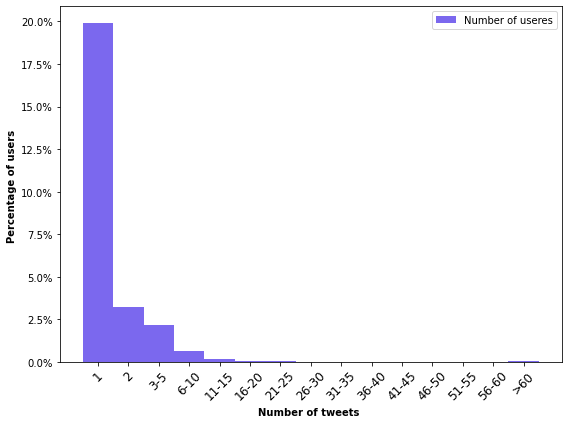

In [93]:

plot_gelöschte_tweets_pero_Benutzer(list_gelöschte_benutzer_zahl, [ '1', '2', '3-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55','56-60', '>60'], 'Barplot_tweetscov19_number_of_deleted_tweets_pro_benutzer')

In [143]:
def plot_cdf(df, title): 
    x = np.sort(df)
    y = np.arange(1, len(x)+1) / len(x)

    plt.rcParams["figure.figsize"] = [15,8]
    fig, ax = plt.subplots()
    plt.plot(x, y, marker='.', linestyle='None', rasterized=True)
    
    
    plt.plot((0, 3500), (0.95, 0.95), '--')
    plt.plot((23, 23), (0, 1), '--')
    
    plt.xticks((np.arange(0, len(x)+1, 500)))
    plt.yticks([0.2,0.4,0.6,0.8,0.95])
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    ax.set_ylabel('CDF', fontsize=20)    
    ax.set_xlabel('Number of deleted Tweets per User', fontsize=20)
    plt.margins(0.02)
    
    fig.tight_layout()
    plt.savefig('../../plots/'+title+'.pdf')
    plt.show()

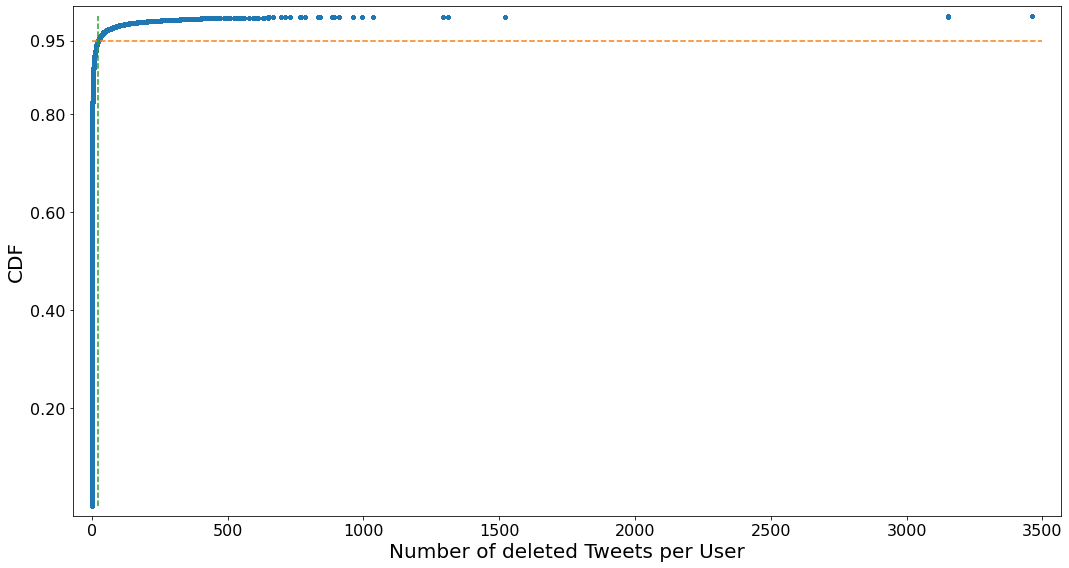

In [144]:
plot_cdf(df_tweetscov19['user_deleted_tweets'], 'cdf_tweetscov19')

In [142]:
df_tweetscov19_del.shape

(2137501, 95)

In [5]:
df_tweetscov19.user_deleted_tweets.describe()

count   9409841.00
mean         10.92
std         104.51
min           0.00
25%           0.00
50%           0.00
75%           1.00
max        3462.00
Name: user_deleted_tweets, dtype: float64

In [5]:
#Quantile
q = [0.1, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99]
print(len(q))
for i in range(0,len(q)):
    print("{:.2f}".format(q[i]), '=> ',df_tweetscov19['user_deleted_tweets'].quantile(q[i]))


7
0.10 =>  0.0
0.50 =>  0.0
0.75 =>  1.0
0.90 =>  7.0
0.95 =>  23.0
0.98 =>  96.0
0.99 =>  224.0


In [12]:
#excluded tweets
df_tweetscov19_excluded = df_tweetscov19[df_tweetscov19['user_deleted_tweets'] > 23]

df_tweetscov19_excluded_del = df_tweetscov19_excluded[df_tweetscov19_excluded['is_deleted']==True]
df_tweetscov19_excluded_undel = df_tweetscov19_excluded[df_tweetscov19_excluded['is_deleted']==False]

print('Number of deleted tweets in Dataset:', df_tweetscov19_excluded_del.shape[0])
print('Number of non-deleted tweets in Dataset:', df_tweetscov19_excluded_undel.shape[0])

Number of deleted tweets in Dataset: 372830
Number of non-deleted tweets in Dataset: 93256


In [6]:
#0.98 Quantile == 23
df_tweetscov19 = df_tweetscov19[df_tweetscov19['user_deleted_tweets'] <= 23]

In [10]:
users_after_quantile = df_tweetscov19.Username.nunique()
print('Number of users in Dataset:', users_after_quantile)
print('Number of excluded users:', 4095876 - users_after_quantile)

tweets_after_quantile = df_tweetscov19.shape[0]
print('Number of tweets in Dataset:', tweets_after_quantile)
print('Number of excluded tweets:', 9409841 - tweets_after_quantile)

Number of users in Dataset: 4090290
Number of excluded users: 5586
Number of tweets in Dataset: 8943755
Number of excluded tweets: 466086


In [23]:
df_tweetscov19.shape

(8943755, 95)

In [25]:
df_tweetscov19_del.shape

(1764671, 95)

In [26]:
df_tweetscov19_undel.shape

(7179084, 95)

In [27]:
df_tweetscov19.Username.nunique()

4090290

In [32]:
df_tweetscov19_sample_del = df_tweetscov19_del.sample(n = 100000)

In [33]:
df_tweetscov19_sample_undel = df_tweetscov19_undel.sample(n = 100000)

In [34]:
df_tweetscov19_sample = df_tweetscov19_sample_del.append(df_tweetscov19_sample_undel, ignore_index=True)

In [35]:
path = '../../data/df_tweetscov19_sample_200000_23.tsv'

with open(path, 'w', newline='', encoding="utf-8") as out_file:
    tsv_writer = csv.writer(out_file, delimiter="\t")
    for idx, row in df_tweetscov19_sample.iterrows():
        tsv_writer.writerow(row.values.tolist())